In [1]:
from chebGreen.chebpy2 import Chebfun2, Chebpy2Preferences
import numpy as np
import matplotlib.pyplot as plt

In [2]:
eps = 1e-5
factor = 1e-2

In [3]:
def green(x,s):
    np.random.seed(42)
    g = 0
    g = (x <= s) * (x * (1-s)) + (x > s) * (s * (1-x))
    g = g + np.random.normal(loc = 0.0, scale = 0.25 * eps * factor, size=x.shape)
    return g

In [4]:
cheb2prefs = Chebpy2Preferences()
cheb2prefs.prefx.eps = eps
cheb2prefs.prefx.eps = eps

In [5]:
%%time
g = Chebfun2(green, domain = [0, 1, 0, 1], prefs = cheb2prefs)

CPU times: user 21.1 ms, sys: 3.61 ms, total: 24.7 ms
Wall time: 27 ms


In [6]:
xx = np.linspace(0,1,2000)
yy = np.linspace(0,1,2000)
x, y = np.meshgrid(xx,yy)

In [7]:
%%time
G = g[x,y]

CPU times: user 53.7 ms, sys: 15.6 ms, total: 69.3 ms
Wall time: 36.7 ms


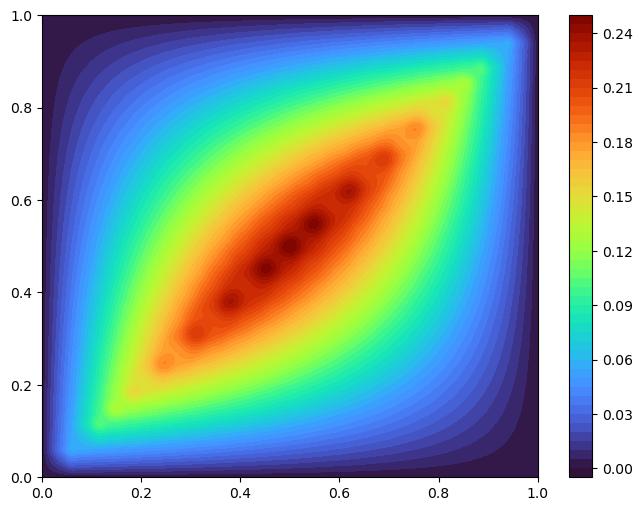

In [8]:
fig = plt.figure(figsize = (8,6))
plt.contourf(x, y, G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

0.25000000102297937


(0.0, 1.0)

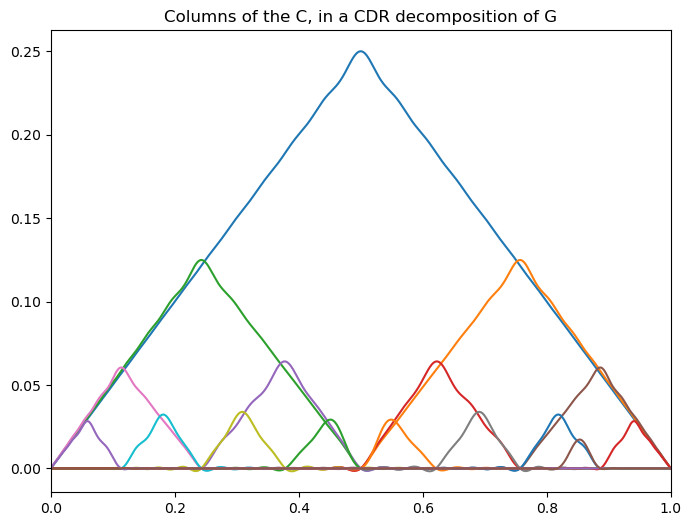

In [10]:
i = slice(0,-1)
fig = plt.figure(figsize = (8,6))
g.cols[:,i].plot(fig = fig)
print(np.max(g.cols[:,i].vscale))
plt.title(f'Columns of the C, in a CDR decomposition of G')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

0.017285383834518137


(0.0, 1.0)

<Figure size 800x600 with 0 Axes>

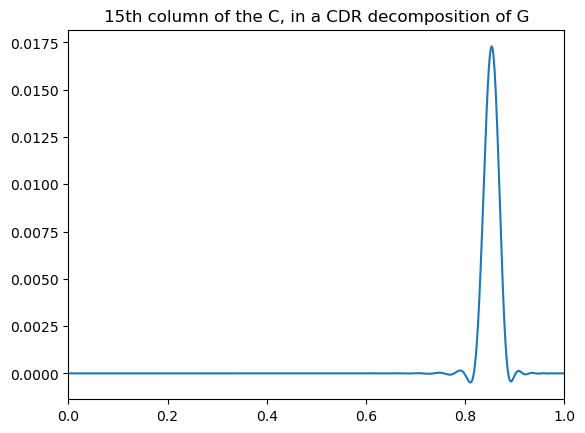

In [12]:
i = 15
fig = plt.figure(figsize = (8,6))
g.cols[:,i].plot()
print(np.max(g.cols[:,i].vscale))
plt.title(f'{i}th column of the C, in a CDR decomposition of G')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [13]:
%%time
u,s,v = g.svd()

CPU times: user 229 ms, sys: 99.9 ms, total: 329 ms
Wall time: 47.5 ms


In [14]:
u.shape

(inf, 17)

3.4336312645203284


(0.0, 1.0)

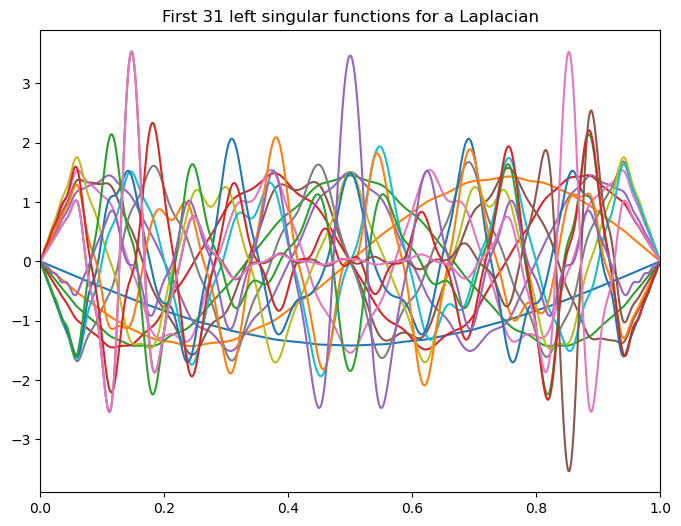

In [16]:
i = 30
fig = plt.figure(figsize = (8,6))
u[:,:i].plot(fig = fig)
print(np.max(u[:,:i].vscale))
plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [17]:
u[0,:i]

array([ 5.79819613e-08,  1.90585291e-07,  3.43751084e-07,  1.40395687e-06,
       -1.18202645e-07, -1.12671553e-06, -3.65104028e-07,  1.96598120e-06,
        4.98224161e-06,  5.11804587e-06,  1.13597050e-06,  1.37064286e-05,
       -1.85427088e-06, -4.47746023e-06, -6.32913574e-06,  1.73220264e-06,
        9.64647328e-06])

In [18]:
Gtheory = green(x,y)
np.linalg.norm(G-Gtheory)/np.linalg.norm(Gtheory)

0.014993578149619826

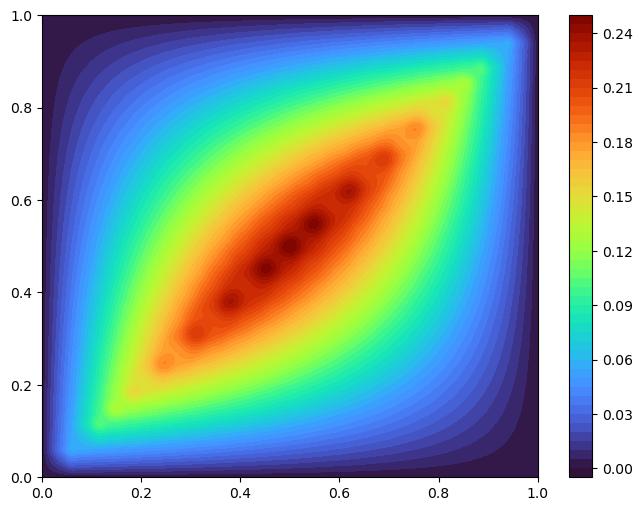

In [19]:
fig = plt.figure(figsize = (8,6))
plt.contourf(x, y, G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

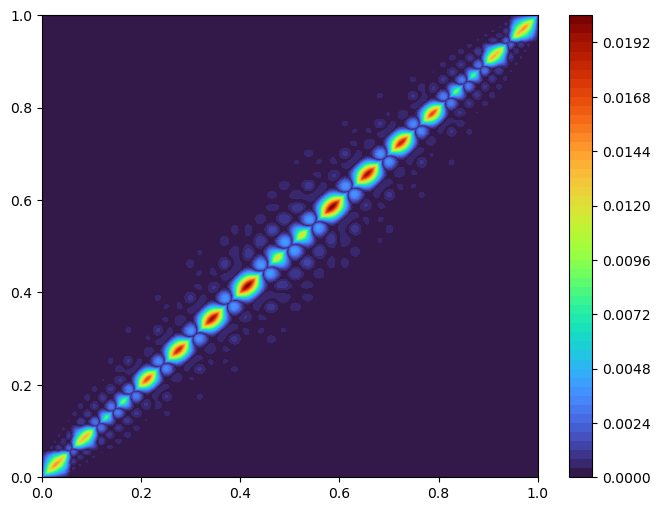

In [20]:
error = np.abs(G-Gtheory)
fig = plt.figure(figsize = (8,6))
plt.contourf(x, y, error, 50, cmap = 'turbo', vmin = np.min(error), vmax = np.max(error))
plt.colorbar()